In [1]:
from multi_imbalance.datasets import load_datasets
import experiment_v2 as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
datasets = load_datasets()

In [3]:
ds_name = 'balance-scale'
test_on_all_folds = True
test_all_ds = False

In [4]:
datasets = ex.one_hot_encode_all(datasets)

In [5]:
config = ex.config_calculation_strategy2(datasets)

In [6]:
config = ex.config_tuned_for_lda(config)

In [7]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 12},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 10},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 'balance-scale': {'nn_config': 

In [8]:
def instantiate_classifiers():
    classifiers = {
            "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
            "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced'),
            "KNN": KNeighborsClassifier(n_neighbors=1),
            "QDA": QuadraticDiscriminantAnalysis(),
            "LDA": LinearDiscriminantAnalysis()
        } 
    return classifiers

In [9]:
from experiment import dt_name_to_cols_to_encode


In [10]:
from sklearn.neighbors import KNeighborsClassifier

def calc_safety5(X,y):
    result = defaultdict(int)
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X, y)
    neighbors = neigh.kneighbors(X, 5+1, False)
    for i, (x, nbors) in enumerate(list(zip(X, neighbors))):
#         print(x)
#         print(y[i])
#         print(nbors[1:])
#         print(y[nbors[1:]])
        same_class_nbrs = (y[nbors[1:]] == y[i]).sum()
        if same_class_nbrs >= 4:
            result['safe'] += 1
        elif same_class_nbrs >= 2:
            result['borderline'] += 1
        elif same_class_nbrs == 1:
            result['rare'] += 1
        else:
            result['outlier'] += 1
    return result

In [11]:
def standardize(X_train, X_test):
    means = X_train.mean(axis=0)
    stds = X_train.std(axis=0)
    return (X_train - means) / (stds+1e-6), (X_test - means) / (stds + 1e-6)

balance-scale


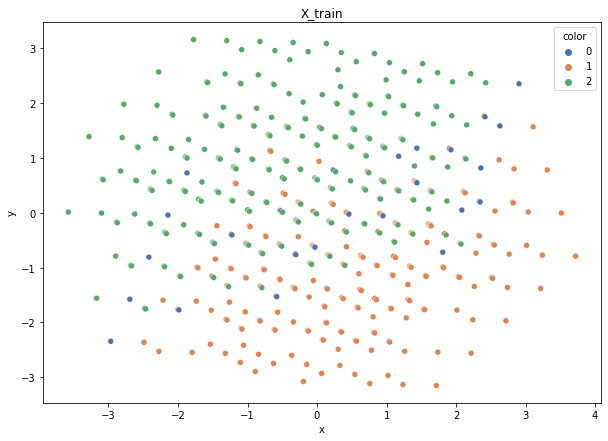

Class cardinalities: Counter({1: 231, 2: 230, 0: 39})
Weights: {0: 0.7471628063958148, 2: 0.1266928236932034, 1: 0.12614436991098174}


100%|██████████| 125/125 [00:00<00:00, 3153.63it/s]


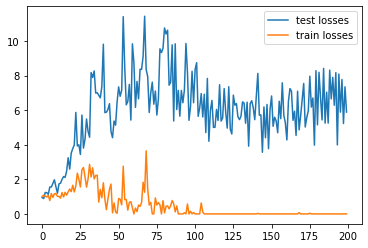

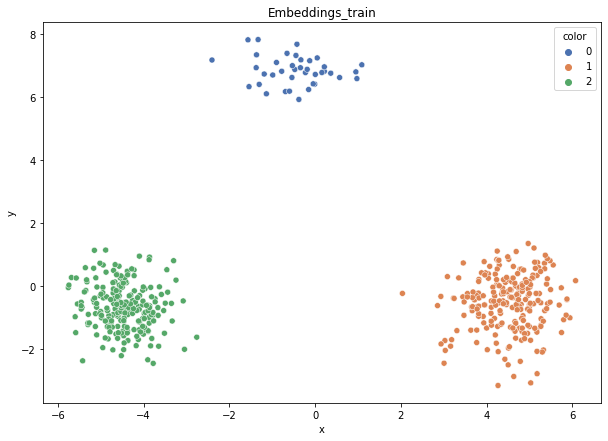

DT-f1-new-features: 0.849
DT-f1-old+new-features: 0.849
DT-f1-old-features: 0.568
DT-gmean-new-features: 0.814
DT-gmean-old+new-features: 0.814
DT-gmean-old-features: 0.088
KNN-f1-new-features: 0.962
KNN-f1-old+new-features: 0.962
KNN-f1-old-features: 0.568
KNN-gmean-new-features: 0.949
KNN-gmean-old+new-features: 0.949
KNN-gmean-old-features: 0.09
LDA-f1-new-features: 0.964
LDA-f1-old+new-features: 0.958
LDA-f1-old-features: 0.617
LDA-gmean-new-features: 0.976
LDA-gmean-old+new-features: 0.971
LDA-gmean-old-features: 0.098
QDA-f1-new-features: 0.962
QDA-f1-old+new-features: 0.962
QDA-f1-old-features: 0.936
QDA-gmean-new-features: 0.949
QDA-gmean-old+new-features: 0.949
QDA-gmean-old-features: 0.971
RF24-f1-new-features: 0.962
RF24-f1-old+new-features: 0.962
RF24-f1-old-features: 0.585
RF24-gmean-new-features: 0.948
RF24-gmean-old+new-features: 0.948
RF24-gmean-old-features: 0.092


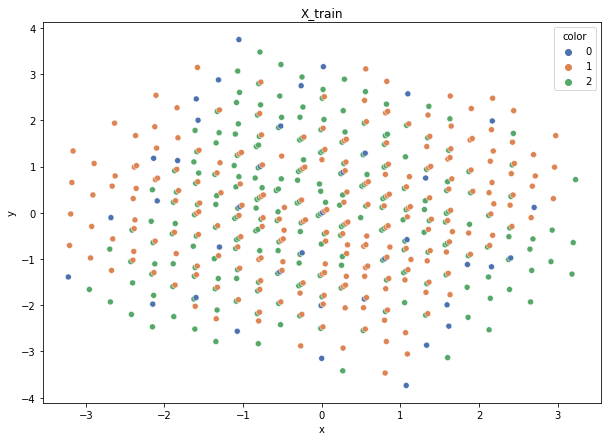

Class cardinalities: Counter({1: 231, 2: 230, 0: 39})
Weights: {0: 0.7471628063958148, 2: 0.1266928236932034, 1: 0.12614436991098174}


100%|██████████| 125/125 [00:00<00:00, 3272.24it/s]


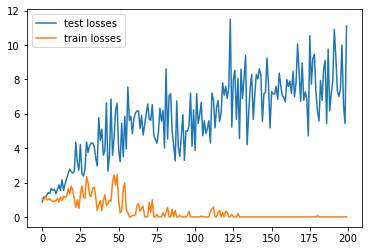

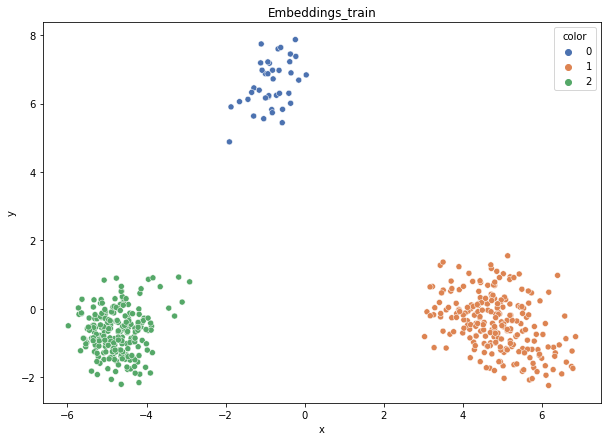

DT-f1-new-features: 0.818
DT-f1-old+new-features: 0.812
DT-f1-old-features: 0.638
DT-gmean-new-features: 0.72
DT-gmean-old+new-features: 0.715
DT-gmean-old-features: 0.585
KNN-f1-new-features: 0.915
KNN-f1-old+new-features: 0.888
KNN-f1-old-features: 0.545
KNN-gmean-new-features: 0.872
KNN-gmean-old+new-features: 0.829
KNN-gmean-old-features: 0.088
LDA-f1-new-features: 0.938
LDA-f1-old+new-features: 0.938
LDA-f1-old-features: 0.601
LDA-gmean-new-features: 0.937
LDA-gmean-old+new-features: 0.937
LDA-gmean-old-features: 0.096
QDA-f1-new-features: 0.779
QDA-f1-old+new-features: 0.779
QDA-f1-old-features: 0.845
QDA-gmean-new-features: 0.654
QDA-gmean-old+new-features: 0.654
QDA-gmean-old-features: 0.908
RF24-f1-new-features: 0.94
RF24-f1-old+new-features: 0.916
RF24-f1-old-features: 0.591
RF24-gmean-new-features: 0.912
RF24-gmean-old+new-features: 0.901
RF24-gmean-old-features: 0.092


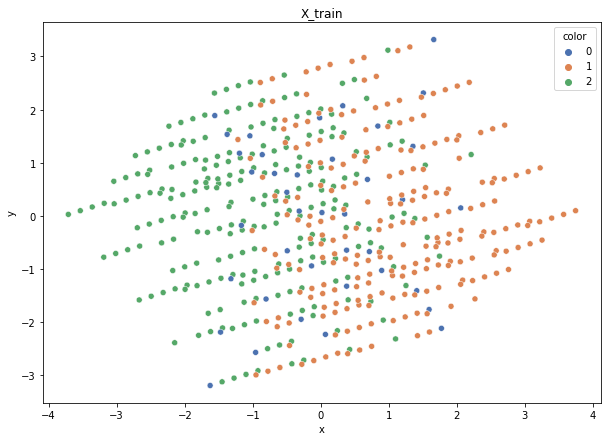

Class cardinalities: Counter({2: 231, 1: 230, 0: 39})
Weights: {2: 0.12614436991098174, 1: 0.1266928236932034, 0: 0.7471628063958148}


100%|██████████| 125/125 [00:00<00:00, 3516.42it/s]


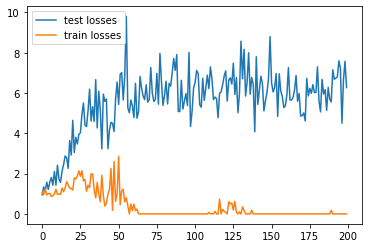

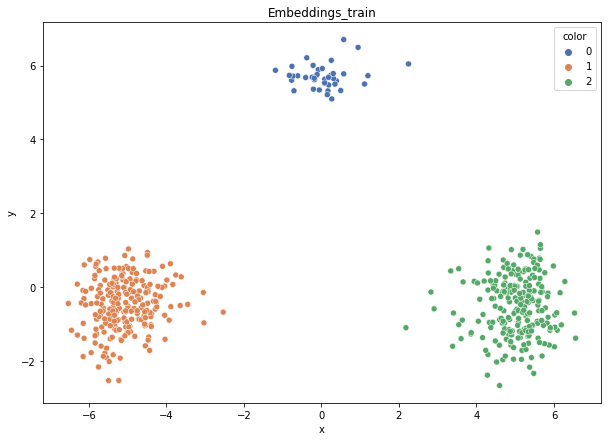

DT-f1-new-features: 0.858
DT-f1-old+new-features: 0.916
DT-f1-old-features: 0.655
DT-gmean-new-features: 0.78
DT-gmean-old+new-features: 0.937
DT-gmean-old-features: 0.597
KNN-f1-new-features: 0.881
KNN-f1-old+new-features: 0.892
KNN-f1-old-features: 0.566
KNN-gmean-new-features: 0.862
KNN-gmean-old+new-features: 0.862
KNN-gmean-old-features: 0.09
LDA-f1-new-features: 0.865
LDA-f1-old+new-features: 0.857
LDA-f1-old-features: 0.6
LDA-gmean-new-features: 0.857
LDA-gmean-old+new-features: 0.857
LDA-gmean-old-features: 0.096
QDA-f1-new-features: 0.888
QDA-f1-old+new-features: 0.888
QDA-f1-old-features: 0.836
QDA-gmean-new-features: 0.829
QDA-gmean-old+new-features: 0.829
QDA-gmean-old-features: 0.923
RF24-f1-new-features: 0.85
RF24-f1-old+new-features: 0.85
RF24-f1-old-features: 0.602
RF24-gmean-new-features: 0.857
RF24-gmean-old+new-features: 0.857
RF24-gmean-old-features: 0.093


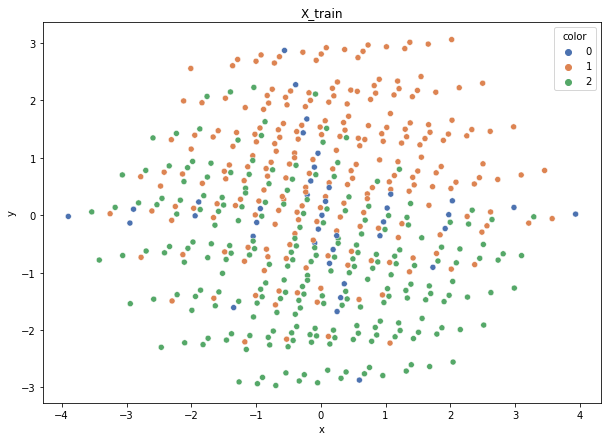

Class cardinalities: Counter({2: 231, 1: 230, 0: 39})
Weights: {0: 0.7471628063958148, 2: 0.12614436991098174, 1: 0.1266928236932034}


100%|██████████| 125/125 [00:00<00:00, 3190.75it/s]


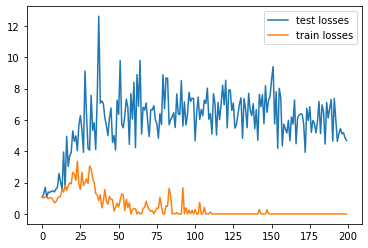

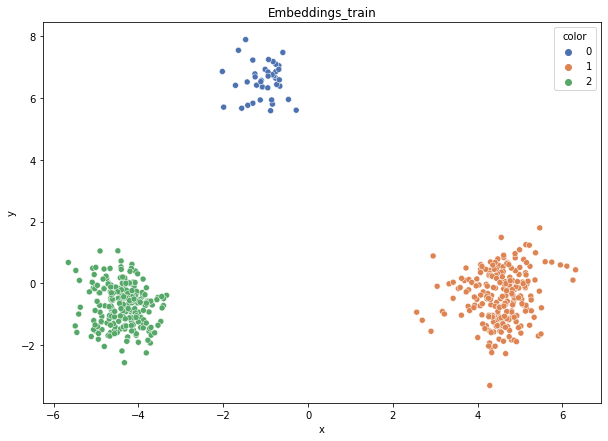

DT-f1-new-features: 0.938
DT-f1-old+new-features: 0.915
DT-f1-old-features: 0.582
DT-gmean-new-features: 0.937
DT-gmean-old+new-features: 0.926
DT-gmean-old-features: 0.397
KNN-f1-new-features: 0.921
KNN-f1-old+new-features: 0.94
KNN-f1-old-features: 0.562
KNN-gmean-new-features: 0.907
KNN-gmean-old+new-features: 0.912
KNN-gmean-old-features: 0.089
LDA-f1-new-features: 0.983
LDA-f1-old+new-features: 0.964
LDA-f1-old-features: 0.6
LDA-gmean-new-features: 0.982
LDA-gmean-old+new-features: 0.977
LDA-gmean-old-features: 0.096
QDA-f1-new-features: 0.915
QDA-f1-old+new-features: 0.915
QDA-f1-old-features: 0.809
QDA-gmean-new-features: 0.872
QDA-gmean-old+new-features: 0.872
QDA-gmean-old-features: 0.862
RF24-f1-new-features: 0.964
RF24-f1-old+new-features: 0.944
RF24-f1-old-features: 0.603
RF24-gmean-new-features: 0.977
RF24-gmean-old+new-features: 0.943
RF24-gmean-old-features: 0.094


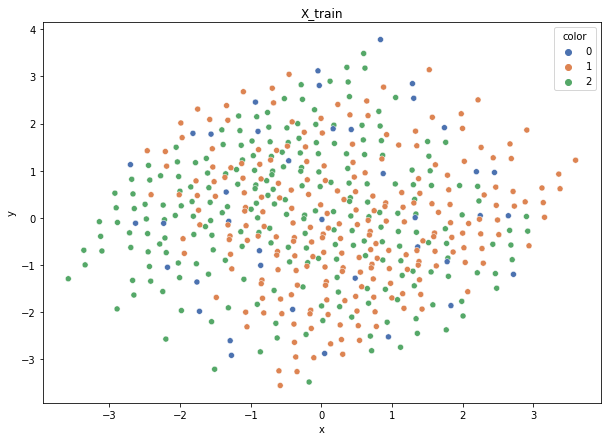

Class cardinalities: Counter({2: 230, 1: 230, 0: 40})
Weights: {0: 0.7419354838709677, 2: 0.12903225806451613, 1: 0.12903225806451613}


100%|██████████| 125/125 [00:00<00:00, 3255.27it/s]


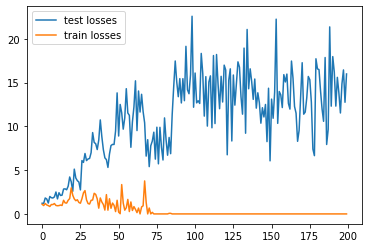

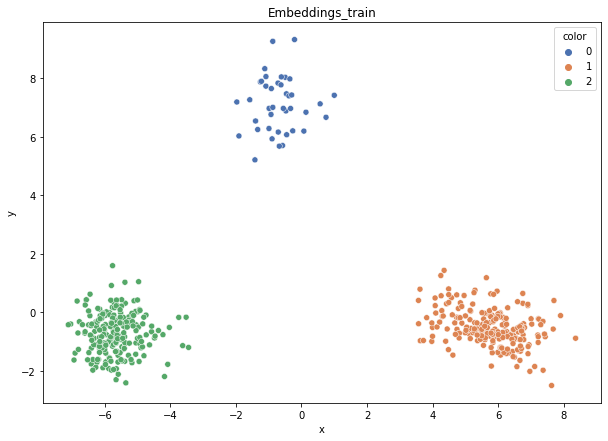

DT-f1-new-features: 0.794
DT-f1-old+new-features: 0.794
DT-f1-old-features: 0.582
DT-gmean-new-features: 0.774
DT-gmean-old+new-features: 0.774
DT-gmean-old-features: 0.415
KNN-f1-new-features: 0.887
KNN-f1-old+new-features: 0.887
KNN-f1-old-features: 0.563
KNN-gmean-new-features: 0.911
KNN-gmean-old+new-features: 0.911
KNN-gmean-old-features: 0.089
LDA-f1-new-features: 0.869
LDA-f1-old+new-features: 0.863
LDA-f1-old-features: 0.62
LDA-gmean-new-features: 0.877
LDA-gmean-old+new-features: 0.871
LDA-gmean-old-features: 0.098
QDA-f1-new-features: 0.843
QDA-f1-old+new-features: 0.83
QDA-f1-old-features: 0.859
QDA-gmean-new-features: 0.833
QDA-gmean-old+new-features: 0.789
QDA-gmean-old-features: 0.917
RF24-f1-new-features: 0.73
RF24-f1-old+new-features: 0.795
RF24-f1-old-features: 0.587
RF24-gmean-new-features: 0.653
RF24-gmean-old+new-features: 0.774
RF24-gmean-old-features: 0.091


In [12]:
result_dict = defaultdict(list)

safety_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
# for dataset_name in list(datasets.keys()):
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    fold_result_dict = defaultdict(list)
    
    safety_dict["dataset"].append(dataset_name)
    fold_safety_dict = defaultdict(list)

    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    
    folds = []
    if test_on_all_folds:
        folds = skf.split(X, y)
    else:
        folds = list(skf.split(X, y))[1:2]
        
    for train_index, test_index in folds:
        X_train, X_test = X[train_index], X[test_index]
        X_train_norm, X_test_norm = standardize(X_train, X_test)
        y_train, y_test = y[train_index], y[test_index]
        
        
        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        X_train_enc, X_test_enc = standardize(X_train_enc, X_test_enc)
        
        
        # PCA X_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(X_train), y_train)
        plt.title("X_train")
        plt.show()
        
        weights = ex.weights_calculation_strategy1(X_train, y_train)
        cfg =  config[dataset_name]
        # pretrain ANN triplets
        embeddings_train, embeddings_test = ex.train_triplets(X_train_enc, y_train, X_test_enc, y_test, weights,cfg)
        
        s_dict = calc_safety5(embeddings_test, y_test)
        for k, v in s_dict.items():
            fold_safety_dict[f"emb-{k}"].append(v)
            
        s_dict = calc_safety5(X_test_enc, y_test)
        for k,v in s_dict.items():
            fold_safety_dict[f"raw-{k}"].append(v)
        
        # PCA embeddings_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(embeddings_train), y_train)
        plt.title("Embeddings_train")
        plt.show()
        
        X_train_new = np.hstack([X_train_norm, embeddings_train])
        X_test_new = np.hstack([X_test_norm, embeddings_test])
        
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_norm, y_train)
            preds = clf.predict(X_test_norm)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_new, y_train)
            preds = clf.predict(X_test_new)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old+new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old+new-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(embeddings_train, y_train)
            preds = clf.predict(embeddings_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-new-features"].append(gmean)
        for key in sorted(list(fold_result_dict.keys())):
            print(f"{key}: {np.round(fold_result_dict[key][-1],3)}")
            
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))
        
    for k in fold_safety_dict:
        safety_dict[k].append(np.sum(fold_safety_dict[k]) / X.shape[0])

In [13]:
results_df = pd.DataFrame.from_dict(result_dict)

In [14]:
safety_df = pd.DataFrame.from_dict(safety_dict)

In [15]:
results_df

,dataset,RF24-f1-old-features,RF24-gmean-old-features,DT-f1-old-features,DT-gmean-old-features,KNN-f1-old-features,KNN-gmean-old-features,QDA-f1-old-features,QDA-gmean-old-features,LDA-f1-old-features,...,RF24-f1-new-features,RF24-gmean-new-features,DT-f1-new-features,DT-gmean-new-features,KNN-f1-new-features,KNN-gmean-new-features,QDA-f1-new-features,QDA-gmean-new-features,LDA-f1-new-features,LDA-gmean-new-features
0,balance-scale,0.593905,0.092184,0.605016,0.416495,0.560676,0.089082,0.857046,0.916265,0.607652,...,0.889022,0.869287,0.851282,0.804931,0.913355,0.90014,0.877645,0.827222,0.923685,0.925909


In [16]:
safety_df[sorted(safety_df.filter(regex=("dataset|emb")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,emb-borderline,emb-outlier,emb-rare,emb-safe
0,balance-scale,0.057600,0.009600,0.022400,0.910400


In [17]:
safety_df[sorted(safety_df.filter(regex=("dataset|raw")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,raw-borderline,raw-outlier,raw-rare,raw-safe
0,balance-scale,0.505600,0.064000,0.120000,0.310400


In [18]:
safety_df[sorted(safety_df.filter(regex=("dataset|.*safe")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,emb-safe,raw-safe
0,balance-scale,0.910400,0.310400


In [19]:
results_df.filter(regex=("dataset|RF24-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,RF24-f1-old-features,RF24-f1-old+new-features,RF24-f1-new-features
0,balance-scale,0.593905,0.893081,0.889022


In [20]:
results_df.filter(regex=("dataset|RF24-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,RF24-gmean-old-features,RF24-gmean-old+new-features,RF24-gmean-new-features
0,balance-scale,0.092184,0.884605,0.869287


In [21]:
results_df.filter(regex=("dataset|DT-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,DT-f1-old-features,DT-f1-old+new-features,DT-f1-new-features
0,balance-scale,0.605016,0.857165,0.851282


In [22]:
results_df.filter(regex=("dataset|DT-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,DT-gmean-old-features,DT-gmean-old+new-features,DT-gmean-new-features
0,balance-scale,0.416495,0.833241,0.804931


In [23]:
results_df.filter(regex=("dataset|KNN-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,KNN-f1-old-features,KNN-f1-old+new-features,KNN-f1-new-features
0,balance-scale,0.560676,0.913805,0.913355


In [24]:
results_df.filter(regex=("dataset|KNN-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,KNN-gmean-old-features,KNN-gmean-old+new-features,KNN-gmean-new-features
0,balance-scale,0.089082,0.892455,0.900140


In [25]:
results_df.filter(regex=("dataset|QDA-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,QDA-f1-old-features,QDA-f1-old+new-features,QDA-f1-new-features
0,balance-scale,0.857046,0.874937,0.877645


In [26]:
results_df.filter(regex=("dataset|QDA-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,QDA-gmean-old-features,QDA-gmean-old+new-features,QDA-gmean-new-features
0,balance-scale,0.916265,0.818380,0.827222


In [27]:
results_df.filter(regex=("dataset|LDA-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,LDA-f1-old-features,LDA-f1-old+new-features,LDA-f1-new-features
0,balance-scale,0.607652,0.915961,0.923685


In [28]:
results_df.filter(regex=("dataset|LDA-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,LDA-gmean-old-features,LDA-gmean-old+new-features,LDA-gmean-new-features
0,balance-scale,0.096584,0.922535,0.925909
